<a href="https://colab.research.google.com/github/mukteshsingh95/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Installing recmetrics package for model evaluation
!pip install recmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 793.8/793.8 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.9/120.9 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.9/226.9 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.2/317.2 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [2]:
#import library
import pandas as pd #for data manipulation and analysis
import matplotlib.pyplot as plt # for data visualization and graphical plotting
import seaborn as sns # for data visualization
import numpy as np # for manipulation of multi-dimensional arrays and matrices
import scipy # For metrics factorisation with svd
from scipy.sparse.linalg import svds
import re # For string manipulation
from IPython.display import display, Image # For displaying image
from sklearn.metrics.pairwise import cosine_similarity # For calculating cosine similarity 
import warnings 
import recmetrics
warnings.filterwarnings("ignore")

In [3]:
#mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#loading dataset
Book_df=pd.read_csv("/content/drive/MyDrive/DATA/Books.csv")


In [5]:
Book_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
rating_df = pd.read_csv("/content/drive/MyDrive/DATA/Ratings[1].csv")


In [ ]:
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
user_df = pd.read_csv("/content/drive/MyDrive/DATA/Users[1].csv")

In [ ]:
user_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
Book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271360 non-null  object 
 1   Book-Title           271360 non-null  object 
 2   Book-Author          271359 non-null  object 
 3   Year-Of-Publication  271360 non-null  float64
 4   Publisher            271358 non-null  object 
 5   Image-URL-S          271360 non-null  object 
 6   Image-URL-M          271360 non-null  object 
 7   Image-URL-L          271357 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.6+ MB


In [ ]:
#Checking duplicate observation
Book_df.duplicated().sum()

0

In [ ]:
# Checking for duplicate ISBN
total_rows=Book_df.shape[0]
unique_isbn=len(Book_df["ISBN"].unique())
repeated_isbn=total_rows-unique_isbn
unique_title=len(Book_df["Book-Title"].unique())
repeated_title=total_rows-unique_title
print(f'number of repeated isbn: {repeated_isbn}')
print(f'number of repeated book title: {repeated_title}')

number of repeated isbn: 0
number of repeated book title: 29225


In [ ]:
#checking null values
Book_df.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#first 5 rows of rating_df dataset
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
#information about rating_df dataset
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
#Checking duplicate observation
rating_df.duplicated().sum()

0

In [ ]:
#checking null values
rating_df.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
#first 5 rows of user_df dataset
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
#Checking duplicate observation
user_df.duplicated().sum()

0

In [ ]:
#checking null values
user_df.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [8]:
# Creating dataframe for top 10 authors with highest number of books
top_authors=Book_df.groupby('Book-Author').agg({'Book-Title':'count'}).sort_values(by="Book-Title",ascending=False).head(10).reset_index()
top_authors.rename(columns = {'Book-Author':'Author','Book-Title':"count"},inplace=True)

top_authors
     

,Author,count
0,Agatha Christie,632
1,William Shakespeare,567
2,Stephen King,524
3,Ann M. Martin,423
4,Carolyn Keene,373
5,Francine Pascal,372
6,Isaac Asimov,330
7,Nora Roberts,315
8,Barbara Cartland,307
9,Charles Dickens,302


Text(0, 0.5, 'Number Of Books')

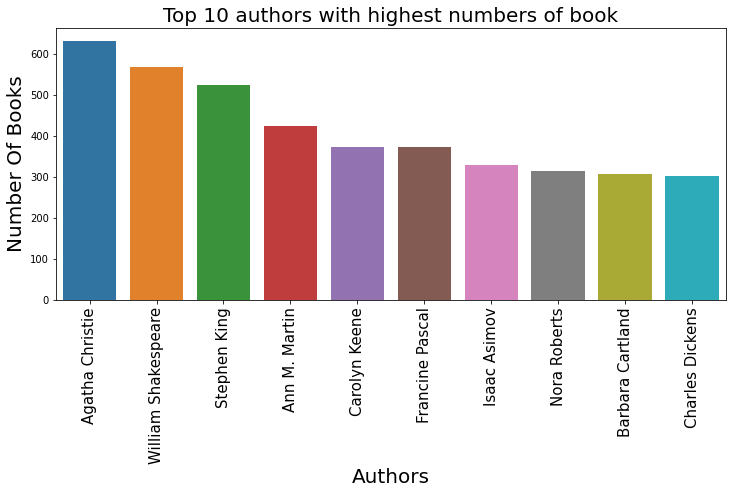

In [9]:
# Plotting bar graph for top 10 authors with highest number of books
plt.figure(figsize=(12,5))
sns.barplot(data=top_authors, x="Author", y="count")
plt.title("Top 10 authors with highest numbers of book",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Authors",fontsize=20)
plt.ylabel("Number Of Books",fontsize=20)

# **Observation:** 
Agatha Christie is the Top author with highest numbers of books.

# **Unique** **values** **for** **year** **of** **publication** **column**

In [10]:
# Unique values of year of publication column
Book_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [11]:
#Checking the rows with wrong value
Book_df.loc[(Book_df['Year-Of-Publication'] == 'DK Publishing Inc') | (Book_df['Year-Of-Publication'] == 'Gallimard'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [12]:
# correct the 'Year of Publication' column
#ISBN = '0789466953'
Book_df.loc[Book_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
Book_df.loc[Book_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
Book_df.loc[Book_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
Book_df.loc[Book_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Book_df Come to Life(Level 4: Proficient Readers)"

#ISBN = '078946697X'
Book_df.loc[Book_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
Book_df.loc[Book_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
Book_df.loc[Book_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
Book_df.loc[Book_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began(Level 4: Proficient Readers)"

#ISBN = '2070426769'
Book_df.loc[Book_df.ISBN == '2070426769','Year-Of-Publication'] = 2003
Book_df.loc[Book_df.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio"
Book_df.loc[Book_df.ISBN == '2070426769','Publisher'] = "Gallimard"
Book_df.loc[Book_df.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers'"


Book_df.loc[(Book_df.ISBN == '0789466953') | (Book_df.ISBN == '078946697X') | (Book_df.ISBN == '2070426769'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers'",Jean-Marie Gustave Le ClÃƒ?Ã‚Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [13]:
#Converting Year-Of-Publication column from string to integer
Book_df['Year-Of-Publication'] = Book_df['Year-Of-Publication'].apply(lambda x: int(x))

In [14]:
#fill the wrong entries with Nan values.
Book_df.loc[(Book_df['Year-Of-Publication'] >= 2006) | (Book_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN


#replacing NaN values with median 
Book_df['Year-Of-Publication'].fillna(round(Book_df['Year-Of-Publication'].median()), inplace=True)

<AxesSubplot:xlabel='Year-Of-Publication', ylabel='Density'>

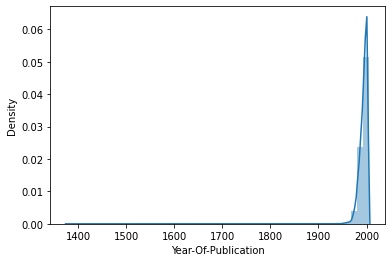

In [15]:
# Distplot for Year of Publication
sns.distplot(Book_df['Year-Of-Publication'])

# **Observation:**

## Most of the books are published between 1970 to 2003.

# **Top 10 Publishers with highest numbers of books**

In [16]:
# Creating dataframe for top 10 publisher with highest number of books
top_Publisher=Book_df.groupby('Publisher').agg({'Book-Title':'count'}).sort_values(by="Book-Title",ascending=False).head(10).reset_index()
top_Publisher.rename(columns = {'Publisher':'Publisher','Book-Title':"count"},inplace=True)

In [17]:
top_Publisher

,Publisher,count
0,Harlequin,7535
1,Silhouette,4220
2,Pocket,3905
3,Ballantine Books,3783
4,Bantam Books,3646
5,Scholastic,3160
6,Simon &amp; Schuster,2971
7,Penguin Books,2844
8,Berkley Publishing Group,2771
9,Warner Books,2727


Text(0, 0.5, 'Number Of Books')

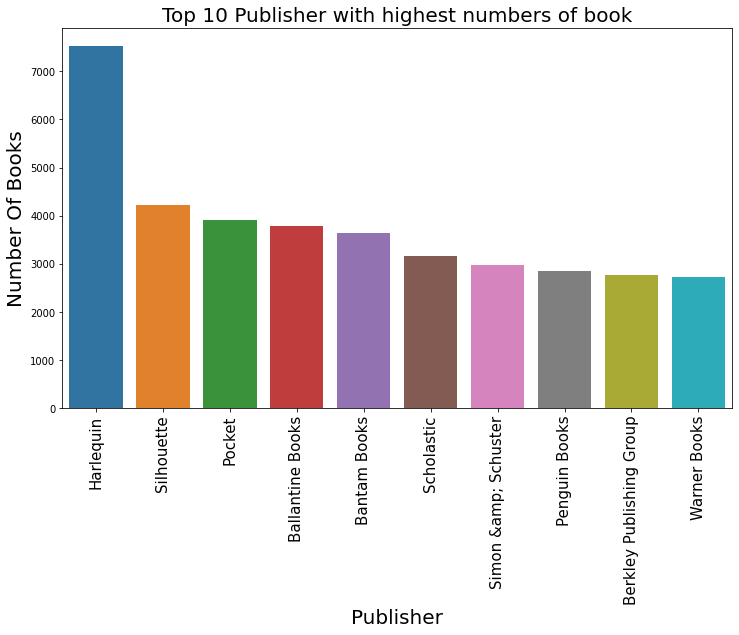

In [18]:
# Plotting bar graph for top 10 publisher with highest number of books
plt.figure(figsize=(12,7))
sns.barplot(data=top_Publisher, x="Publisher", y="count")
plt.title("Top 10 Publisher with highest numbers of book",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Publisher",fontsize=20)
plt.ylabel("Number Of Books",fontsize=20)

# **Observation:**

# Harlequin is the Top Publisher with highest numbers of book

# **Top Country with highest numbers of users**

In [19]:
# Finding countries from location column
loction_df=user_df['Location'].apply(lambda x: pd.Series(str(x).split(",")))[2]

In [20]:
# Creating new column named country
user_df['Country']=loction_df

In [21]:
# Finding countries with highest number of users
user_location=user_df[['User-ID']]
user_location['Country']=loction_df

In [22]:
top_location=user_location.groupby('Country').agg({'User-ID':'count'}).sort_values(by="User-ID",ascending=False).head(16).reset_index()
top_location.rename(columns = {'Country':'Country','User-ID':"count"},inplace=True)

In [ ]:
top_location=top_location.drop(7)

In [ ]:
top_location

,Country,count
0,usa,139187
1,canada,21558
2,united kingdom,18286
3,germany,17022
4,spain,13095
5,australia,11723
6,italy,11242
8,france,3442
9,portugal,3306
10,new zealand,3071


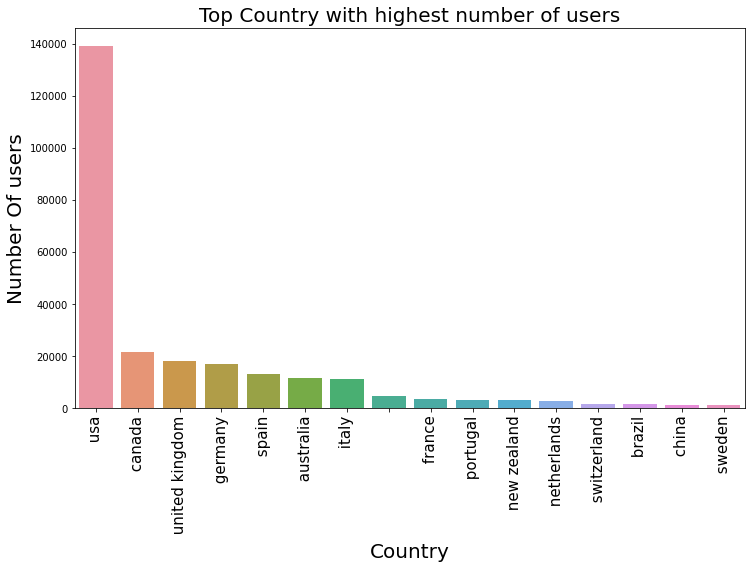

In [23]:
# Plotting bar graph for top country with highest number of users 
plt.figure(figsize=(12,7))
sns.barplot(data=top_location, x="Country", y="count")
plt.title("Top Country with highest number of users",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Country",fontsize=20)
plt.ylabel("Number Of users",fontsize=20);

# **Observation:**

## USA is the Top Country with highest numbers of users

# **Analyzing the age column**

In [24]:
# Description of age column
user_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [25]:
# Checking max age
user_df[user_df['Age']==244]

,User-ID,Location,Age,Country
20856,20857,"stuttgart, baden-wuerttemberg, germany",244.0,germany


<AxesSubplot:xlabel='Age'>

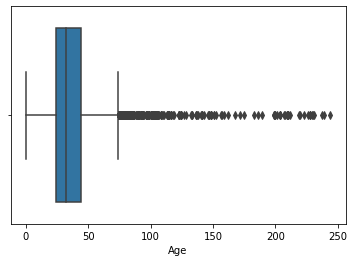

In [26]:
# Box plot for age column
sns.boxplot(user_df['Age'])


# **Observation:**

**There are some outlier in the age column**

<AxesSubplot:xlabel='Age', ylabel='Density'>

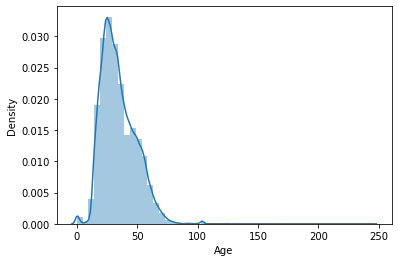

In [27]:
# Dist plot for age column
sns.distplot(user_df['Age'])

# **Observation:**

## We Can see majority of the users are of age 20-35

# Value count of ratings

In [28]:
rating_df['Book-Rating'].value_counts().reset_index().rename(columns={'index':'Rating','Book-Rating':'count'})

,Rating,count
0,0,716109
1,8,103736
2,10,78610
3,7,76457
4,9,67541
5,5,50974
6,6,36924
7,4,8904
8,3,5996
9,2,2759


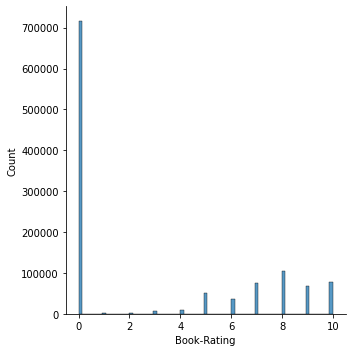

In [29]:
# Dis plot for book rating column
sns.displot(rating_df['Book-Rating'])

**rating distribution without considering 0**

In [30]:
rating_without_0=rating_df[rating_df['Book-Rating']!=0]

In [31]:
# Count of book ratings without rating 0
rating_count=rating_without_0.groupby('Book-Rating').agg({'ISBN':'count'}).sort_values(by="ISBN",ascending=False).head(16).reset_index()
rating_count.rename(columns = {'Book-Rating':'Book-Rating','ISBN':"count"},inplace=True)

In [32]:
rating_count

,Book-Rating,count
0,8,103736
1,10,78610
2,7,76457
3,9,67541
4,5,50974
5,6,36924
6,4,8904
7,3,5996
8,2,2759
9,1,1770


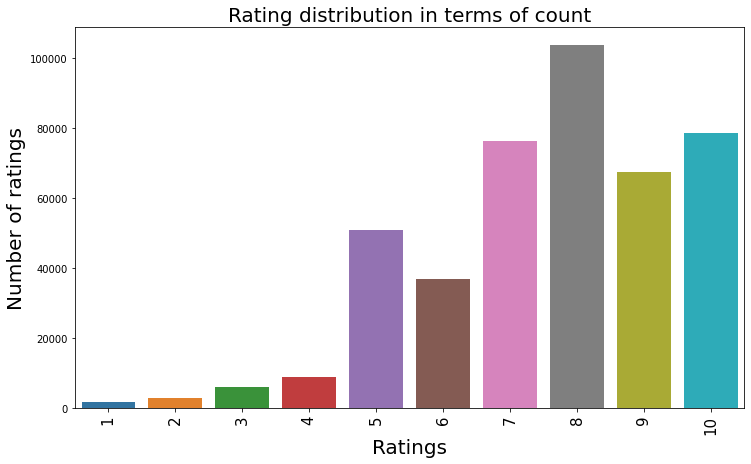

In [33]:
# Plotting bar graph for rating distribution in terms of count
plt.figure(figsize=(12,7))
sns.barplot(data=rating_count, x="Book-Rating", y="count")
plt.title("Rating distribution in terms of count",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("Ratings",fontsize=20)
plt.ylabel("Number of ratings",fontsize=20);

# **Observation:**

## 8 is the most common rating for most number of book

# Top User-ID with highest numbers of rating


In [34]:
#common book for both rating and book dataset
ratings_new = rating_df[rating_df.ISBN.isin(Book_df.ISBN)]

In [ ]:
#common user for both rating and user dataset
ratings_new = ratings_new[ratings_new['User-ID'].isin(user_df['User-ID'])]

In [ ]:
#checking shape
rating_df.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

In [35]:
#  Creating dataframe to calculate Top userId's who have rated most number of books  
top_user_rating=ratings_new.groupby('User-ID').agg({'Book-Rating':'count'}).sort_values(by="Book-Rating",ascending=False).reset_index()
top_user_rating.rename(columns = {'User-ID':'User-ID','Book-Rating':"count"},inplace=True)
top_user_rating['User-ID']=top_user_rating['User-ID'].apply(lambda x:'UserId '+str(x)) 

In [36]:
top_user_rating=top_user_rating.head(15)
top_user_rating

,User-ID,count
0,UserId 11676,11144
1,UserId 198711,6456
2,UserId 153662,5814
3,UserId 98391,5779
4,UserId 35859,5646
5,UserId 212898,4289
6,UserId 278418,3996
7,UserId 76352,3329
8,UserId 110973,2971
9,UserId 235105,2943


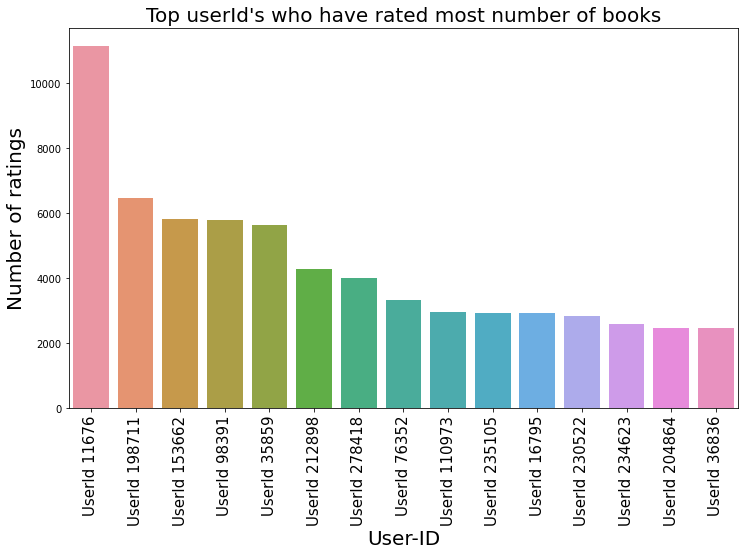

In [37]:
# PLotting bar graph for Top userId's who have rated most number of books
plt.figure(figsize=(12,7))
sns.barplot(data=top_user_rating, x="User-ID", y="count")
plt.title("Top userId's who have rated most number of books",fontsize=20);
plt.xticks(rotation=90,fontsize=15)
plt.xlabel("User-ID",fontsize=20)
plt.ylabel("Number of ratings",fontsize=20);

# **Observation:**

UserId 11676 has rated most number of books

# Data pre-processing and feature engineering


In [38]:
#Rating ranges from 1 to 10 with no 0
rating_without_0=ratings_new[ratings_new['Book-Rating']!=0]

In [39]:
#merge dataset
Final_df_=user_df.copy()
Final_df_=pd.merge(Final_df_,rating_without_0,on='User-ID')
Final_df_=pd.merge(Final_df_,Book_df,on='ISBN')

In [40]:
Final_df=Final_df_[['User-ID','Age','ISBN','Book-Rating','Book-Title','Book-Author','Year-Of-Publication','Publisher','Image-URL-S']]

In [ ]:
#checking shape
Final_df.shape

(383842, 9)

In [ ]:
# First 5 rows of Final_df dataset
Final_df.head()


,User-ID,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S
0,8,NaN,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
1,11676,NaN,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,67544,30.0,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
3,116866,NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
4,123629,NaN,0002005018,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...


In [41]:
# Checking null values
Final_df.isnull().sum()

User-ID                     0
Age                    114221
ISBN                        0
Book-Rating                 0
Book-Title                  0
Book-Author                 1
Year-Of-Publication         0
Publisher                   2
Image-URL-S                 0
dtype: int64

# Handling null values

<AxesSubplot:xlabel='Age', ylabel='Density'>

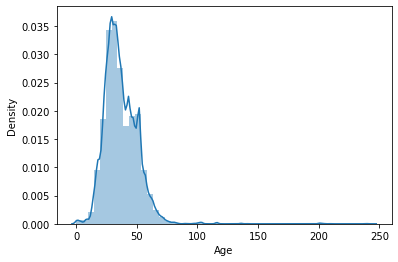

In [42]:
# Dist plot for age column
sns.distplot(Final_df['Age'])

In [43]:
# Replacing all the ages more than 100 and less than 5 with np.nan 
Final_df.loc[(Final_df.Age > 100) | (Final_df.Age < 5), 'Age'] = np.nan

In [ ]:
# Checking null values of age column
Final_df['Age'].isnull().sum()

115824

In [44]:
# finding median of age column
median_age=Final_df['Age'].median()

In [ ]:
# Replacing null values with median of age
Final_df['Age'] = Final_df['Age'].fillna(median_age)

In [45]:
#Filling Nan value of Publisher with unknown
Final_df.Publisher.fillna('unknown',inplace=True)

In [ ]:
#Filling Nan value of Book-Author with others
Final_df['Book-Author'].fillna('unknown',inplace=True)

In [ ]:
# Checking null values
Final_df.isnull().sum()

User-ID                0
Age                    0
ISBN                   0
Book-Rating            0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
dtype: int64

In [ ]:
# Finding duplicates
Final_df.duplicated().sum()

0

# Popularity Based Recommender System

In [ ]:
# Extracting 'User-ID','Book-Title','Book-Rating' from final_df dataset
Final_df[['User-ID','Book-Title','Book-Rating']]

,User-ID,Book-Title,Book-Rating
0,8,Clara Callan,5
1,11676,Clara Callan,8
2,67544,Clara Callan,8
3,116866,Clara Callan,9
4,123629,Clara Callan,9
...,...,...,...
383837,278851,All Elevations Unknown: An Adventure in the He...,5
383838,278851,WebClasses From Scratch,5
383839,278851,Why stop?: A guide to Texas historical roadsid...,7
383840,278851,The Are You Being Served? Stories: 'Camping In...,7


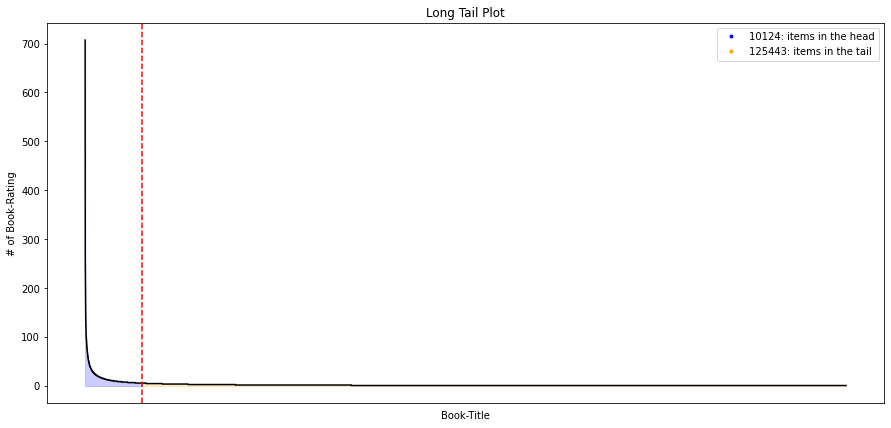

In [46]:
# Checking how many number of boooks are rated with respect to the total number of books 
fig = plt.figure(figsize=(15, 7))
recmetrics.long_tail_plot(df=Final_df[['User-ID','Book-Title','Book-Rating']], 
             item_id_column="Book-Title", 
             interaction_type="Book-Rating", 
             percentage=0.5,
             x_labels=False)

# **Observation**
Very less number of books are rated with respect to total number of books that means number of popular books are fewer in terms of total books.

In [47]:
#count of rating for each book
num_rating=Final_df.groupby('Book-Title').agg({'Book-Rating':'count'}).reset_index()
num_rating.rename(columns = {'Book-Title':'Book-Title','Book-Rating':"Rating_count"},inplace=True)
num_rating

,Book-Title,Rating_count
0,A Light in the Storm: The Civil War Diary of ...,1
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1
2,Dark Justice,1
3,Earth Prayers From around the World: 365 Pray...,7
4,Final Fantasy Anthology: Official Strategy Gu...,2
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1
135563,Ã?Â?rger mit Produkt X. Roman.,3
135564,Ã?Â?sterlich leben.,1
135565,Ã?Â?stlich der Berge.,1


In [48]:
#average rating for each book
avg_rating=Final_df.groupby('Book-Title').agg({'Book-Rating':'mean'}).reset_index()
avg_rating.rename(columns = {'Book-Title':'Book-Title','Book-Rating':"Avg_rating"},inplace=True)
avg_rating

,Book-Title,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000
...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,7.000000
135564,Ã?Â?sterlich leben.,7.000000
135565,Ã?Â?stlich der Berge.,8.000000


In [49]:
#Merging num_rating and avg_rating dataframes on Book-Title column
popular_book_df = num_rating.merge(avg_rating,on='Book-Title')
popular_book_df

,Book-Title,Rating_count,Avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000
...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000
135564,Ã?Â?sterlich leben.,1,7.000000
135565,Ã?Â?stlich der Berge.,1,8.000000


In [ ]:
#book with more than 200 review
popular_book_df = popular_book_df[popular_book_df['Rating_count']>=200]
popular_book_df

,Book-Title,Rating_count,Avg_rating
471,1st to Die: A Novel,236,7.711864
3064,A Painted House,366,7.398907
4046,A Time to Kill,214,8.009346
8134,Angels &amp; Demons,310,8.016129
15761,Bridget Jones's Diary,377,7.625995
29942,Divine Secrets of the Ya-Ya Sisterhood: A Novel,323,7.876161
31316,Dreamcatcher,214,7.219626
36288,Fahrenheit 451,204,8.549020
42293,Girl with a Pearl Earring,278,7.982014
43138,Good in Bed,247,8.044534


In [50]:
#popularity_score=0.7*Avg_rating+0.3*Rating_count
def popularity_score(df):
  ''' Function to give a popularity score to each observation
      using the formula popularity_score=0.7*Avg_rating+0.3*Rating_count'''
  df['popularity_score']=0.6*df['Avg_rating']+0.4*df['Rating_count']
  return df

In [51]:
popular_book=popularity_score(popular_book_df)
popular_book

,Book-Title,Rating_count,Avg_rating,popularity_score
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000,5.800000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000,5.200000
2,Dark Justice,1,10.000000,6.400000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857,7.085714
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000,6.800000
...,...,...,...,...
135562,Ã?Â?bernachten mit Stil. Die schÃ?Â¶nsten Coun...,1,8.000000,5.200000
135563,Ã?Â?rger mit Produkt X. Roman.,3,7.000000,5.400000
135564,Ã?Â?sterlich leben.,1,7.000000,4.600000
135565,Ã?Â?stlich der Berge.,1,8.000000,5.200000


In [52]:
#top 20 recommended book in terms of popularity
Most_popular_book=popular_book.sort_values(by='popularity_score',ascending=False).head(20).reset_index()
Most_popular_book

,index,Book-Title,Rating_count,Avg_rating,popularity_score
0,110229,The Lovely Bones: A Novel,707,8.185290,287.711174
1,132241,Wild Animus,581,4.390706,235.034423
2,102703,The Da Vinci Code,494,8.439271,202.663563
3,116196,The Secret Life of Bees,406,8.477833,167.486700
4,111950,The Nanny Diaries: A Novel,393,7.437659,161.662595
5,114960,The Red Tent (Bestselling Backlist),383,8.182768,158.109661
6,15761,Bridget Jones's Diary,377,7.625995,155.375597
7,3064,A Painted House,366,7.398907,150.839344
8,60688,Life of Pi,336,8.080357,139.248214
9,45374,Harry Potter and the Chamber of Secrets (Book 2),326,8.840491,135.704294


In [53]:
# Extracting the image of most popular books in terms of popularity score
image_list=[]
for title in Most_popular_book['Book-Title']:
  
  url=str(Final_df[Final_df['Book-Title']==title]['Image-URL-S'].head(1))[8:57]
  image_list.append(url)

In [54]:
# Displaying the image of most popular books
for path in image_list:
    img = Image(url=path,height=300,width=300)
    display(img)

# Collaborative Filtering Based Recommender System

In [55]:
# Information about Final_df dataframe
Final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 0 to 383841
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   User-ID              383842 non-null  int64  
 1   Age                  268018 non-null  float64
 2   ISBN                 383842 non-null  object 
 3   Book-Rating          383842 non-null  int64  
 4   Book-Title           383842 non-null  object 
 5   Book-Author          383841 non-null  object 
 6   Year-Of-Publication  383842 non-null  float64
 7   Publisher            383842 non-null  object 
 8   Image-URL-S          383842 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 29.3+ MB


In [56]:
#user with at least 3 rating
rating_user_df=Final_df.groupby('User-ID').agg({'Book-Rating':'count'}).reset_index()
relible_user=rating_user_df[rating_user_df['Book-Rating']>=3]['User-ID'].tolist()
final_relible_user_df = Final_df[Final_df['User-ID'].isin(relible_user)]

In [57]:
#top 1 percent of most reviewed book
threshold = len(final_relible_user_df ['ISBN'].unique()) * 0.01

filter_books_list = final_relible_user_df ['ISBN'].value_counts().head(int(threshold)).index.to_list()
final_relible_user_df  = final_relible_user_df [final_relible_user_df ['ISBN'].isin(filter_books_list)]

In [58]:
# Checking shape of final_relible_user_df 
final_relible_user_df.shape


(64086, 9)

In [59]:
# Applying Pivot table to final_relible_user_df 
user_item_df=final_relible_user_df.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating').fillna(0)
user_item_df.head()


Book-Title,1984,1st to Die: A Novel,2010: Odyssey Two,2nd Chance,3rd Degree,4 Blondes,84 Charing Cross Road,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,...,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Writ of Execution,Writing Down the Bones,Wuthering Heights,Xenocide (Ender Wiggins Saga (Paperback)),Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,"\O\"" Is for Outlaw""",stardust
User-ID,,,,,,,,,,,,,,,,,,,,,
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Collaborative Filtering Based Recommender System using cosine_similarity

In [60]:
# Transposing the user_item_df dataframe
user_item_df_transposed=user_item_df.transpose()


In [61]:
#Applying cosine_similarity to pivot table
similarity_scores = cosine_similarity(user_item_df_transposed)
similarity_scores.shape


(1250, 1250)

In [62]:
def recommend_similer(book_name):
    ''' Function for recommending 10 books with respect to
    the input books'''
    index = np.where(user_item_df_transposed.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:10]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = final_relible_user_df[final_relible_user_df['Book-Title'] == user_item_df_transposed.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        
        
        data.append(item)
    
    return data


In [63]:
# Showing 10 recommended book for the book 1984 using cosine similarity
recommend_similer('1984')


[['Brave New World', 'Aldous Huxley'],
 ['Animal Farm', 'George Orwell'],
 ["The Hitchhiker's Guide to the Galaxy", 'Douglas Adams'],
 ['The Drawing of the Three (The Dark Tower, Book 2)', 'Stephen King'],
 ['The Gunslinger (The Dark Tower, Book 1)', 'Stephen King'],
 ["Slaughterhouse Five or the Children's Crusade: A Duty Dance With Death",
  'Kurt Vonnegut'],
 ["The Restaurant at the End of the Universe (Hitchhiker's Trilogy (Paperback))",
  'Douglas Adams'],
 ['The Catcher in the Rye', 'J.D. Salinger'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)', 'ANNE RICE']]

# Collaborative Filtering Based Recommender System using Singular Value Decomposition Method

In [64]:
# Checking shape of user_item_df dataframe 
user_item_df.shape

(13811, 1250)

In [65]:
#converting to numpy array
user_item_matrix=user_item_df.values

In [66]:
# Checking the shape
user_item_matrix.shape


(13811, 1250)

In [67]:
#factorising matrix using svd
U, sigma, Vt = svds(user_item_matrix, k = 16)

In [68]:
sigma=np.diag(sigma)

In [69]:
# Checking shapes for U, Sigma, Vt matrix
U.shape,sigma.shape,Vt.shape

((13811, 16), (16, 16), (16, 1250))

In [70]:
#reconstructing the matrix
user_item_matrix_new = np.dot(np.dot(U, sigma), Vt) 
user_item_matrix_new

array([[ 1.15198887e-02,  1.76138526e-02,  5.10332845e-03, ...,
         6.29353586e-04,  5.55032329e-03,  1.81166065e-03],
       [-1.64984890e-02,  4.75876175e-01, -5.35392943e-02, ...,
        -9.12689217e-02, -3.69186994e-02,  2.04459761e-02],
       [ 1.06865203e-03,  7.08212163e-02, -1.00160754e-02, ...,
        -2.66859119e-02, -1.40928226e-03, -2.37210790e-02],
       ...,
       [ 7.64889581e-02, -2.93419633e-01,  4.90063544e-02, ...,
         8.22652777e-02, -1.31610855e-02, -1.48963424e-02],
       [-1.66342464e-04,  1.57218395e-02,  5.31666619e-04, ...,
         1.87087648e-02,  2.50349657e-02,  1.71479040e-02],
       [-1.74346498e-02,  9.44221099e-02, -2.34936815e-03, ...,
         4.94379602e-03,  5.86847345e-02,  6.21423719e-03]])

In [71]:
# Checking shape of reconstructed matrix
user_item_matrix_new .shape

(13811, 1250)

In [72]:
#Converting the reconstructed matrix back to a Pandas dataframe
final_svd_df = pd.DataFrame(user_item_matrix_new, columns = user_item_df.columns, index=list(user_item_df.index)).transpose()
final_svd_df.head()

,99,114,165,242,243,244,254,388,424,440,...,278582,278586,278633,278663,278694,278773,278832,278843,278851,278854
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,0.011520,-0.016498,0.001069,0.051223,-0.049149,0.231309,0.409780,0.017890,0.076655,0.030008,...,0.106294,-0.018893,-0.031124,0.013804,-0.016070,-0.027506,-0.030409,0.076489,-0.000166,-0.017435
1st to Die: A Novel,0.017614,0.475876,0.070821,-0.016669,0.426457,0.063179,0.207734,0.000127,-0.009998,-0.006438,...,0.639242,0.019273,-0.001869,-0.004224,0.068642,0.072258,0.041441,-0.293420,0.015722,0.094422
2010: Odyssey Two,0.005103,-0.053539,-0.010016,0.012692,-0.031243,0.067341,0.102214,0.008987,0.010508,0.006284,...,-0.004688,0.003132,0.066965,0.003801,-0.006515,-0.008609,0.001744,0.049006,0.000532,-0.002349
2nd Chance,-0.001404,0.467756,0.054473,-0.020312,0.125163,0.234761,-0.107231,-0.017580,-0.053329,-0.004954,...,0.499641,0.018961,0.049365,-0.036172,0.046446,0.062039,0.031647,-0.423054,-0.005002,0.064031
3rd Degree,-0.003839,0.132261,0.001822,-0.008487,-0.067965,0.093682,0.041233,-0.013323,-0.025678,-0.001015,...,0.170987,0.008126,0.013661,-0.020453,0.009602,0.021996,0.012408,-0.127397,-0.000047,0.006275


In [73]:
# Checking shape for final_svd_df dataframe
final_svd_df.shape


(1250, 13811)

# Prediction of svd recommendar

In [74]:
#function to recommend 10 books for a particular user id
def recommender(svd_df,user_id, items_to_ignore=[], topn=10):
  '''function to recommend 10 books 
      for a particuler user id  using 
      reconstructed matrix through svd method'''
  sorted_recomanded_predictions = svd_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recomandStrength'})
  top_recomand_book=sorted_recomanded_predictions[~sorted_recomanded_predictions['Book-Title'].isin(items_to_ignore)].sort_values('recomandStrength', ascending = False).head(topn)
  return top_recomand_book 

In [75]:
#Recommending 10 books for user id 114 using svd recommendar
recommender(final_svd_df,114, items_to_ignore=[], topn=10)

,Book-Title,recomandStrength
0,The Da Vinci Code,2.248182
1,Angels &amp; Demons,2.182762
2,The Red Tent (Bestselling Backlist),1.050664
3,The Nanny Diaries: A Novel,0.923243
4,The Summons,0.900350
5,A Painted House,0.685134
6,The Fellowship of the Ring (The Lord of the Ri...,0.684829
7,Timeline,0.562416
8,The Hobbit : The Enchanting Prelude to The Lor...,0.555354
9,Digital Fortress : A Thriller,0.533706


In [76]:
#extracting the user id list from user_item_df.index dataframe
user_id_list=user_item_df.index.tolist()


In [77]:
#function to recommend 10 books for all the users
def recommend_for_all(recommender,user_id_list,svd_df):
  '''function to recommend 10 books 
      for all the users  using 
      reconstructed matrix through svd method'''
  user_item_dict={}
  
  for user_id in user_id_list:
    rec=recommender(svd_df,user_id, items_to_ignore=[], topn=15)
    user_item_dict[user_id]=rec['Book-Title'].tolist()
  return user_item_dict 

In [78]:
#List of recommended book for all the users
svd_pred=recommend_for_all(recommender,user_id_list,final_svd_df)

In [79]:
#creating dataframe of recommended book for all the users
user_id_recomanded_book=pd.DataFrame(list(svd_pred.items())).rename(columns={0:"User_id",1:"svd_recomanded_book"})

In [ ]:
#chacking shape of user_id_recomanded_book dataframe
user_id_recomanded_book.shape

(13811, 2)

## **Actual Rating**

In [80]:
#function to find the top 10 rated book by a particular user
def actual_rateing(user_item_df,user_id, items_to_ignore=[], topn=10):
  ''' function to find the top 10 rated book by a particular user.
        It takes user item dataframe and gives top 10 rated 
               item by a particuler user'''
  sorted_actual_rateing = user_item_df.transpose()[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'Rating'})
  top_rating_book=sorted_actual_rateing[~sorted_actual_rateing['Book-Title'].isin(items_to_ignore)].sort_values('Rating', ascending = False).head(topn)
  return top_rating_book

In [82]:
#function to find the top 10 rated book for all user
def rateing_for_all(actual_rateing,user_id_list,user_item_df):
  user_item_dict={}
  '''function to find the top 10 rated book for all user'''
  for user_id in user_id_list:
    rec=actual_rateing(user_item_df,user_id, items_to_ignore=[], topn=10)
    user_item_dict[user_id]=rec['Book-Title'].tolist()
  return user_item_dict

In [83]:
#List of top 10 rated book for all the users
actual_rating=rateing_for_all(actual_rateing,user_id_list,user_item_df)

In [84]:
#creating dataframe of top 10 rated book for all the users
user_id_top_rated_book=pd.DataFrame(list(actual_rating.items())).rename(columns={0:"User_id",1:"Actual_top_rated_book"})

In [85]:
#chacking shape of user_id_top_rated_book dataframe
user_id_top_rated_book.shape

(13811, 2)

In [86]:
#merging user_id_top_rated_book and user_id_recomanded_book dataframe
result_from_svd=user_id_top_rated_book.merge(user_id_recomanded_book,on="User_id")

## **Chart of top 10 actual rated book and top 10 recommended book by svd recommendar for each user**

In [87]:
#Showing top 10 actual rated book and top 10 recommended book by svd recommendar for each user
pd.set_option('display.max_colwidth', None)

result_from_svd

,User_id,Actual_top_rated_book,svd_recomanded_book
0,99,"[Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!, The Pillars of the Earth, Code to Zero, A Prayer for Owen Meany, 2010: Odyssey Two, 2nd Chance, 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))]","[The Da Vinci Code, The Lovely Bones: A Novel, The Fellowship of the Ring (The Lord of the Rings, Part 1), The Firm, To Kill a Mockingbird, The Hobbit : The Enchanting Prelude to The Lord of the Rings, The Client, The Chamber, The Return of the King (The Lord of the Rings, Part 3), Angels &amp; Demons, The Two Towers (The Lord of the Rings, Part 2), The Secret Life of Bees, A Time to Kill, The Pelican Brief, The Rainmaker]"
1,114,"[Angels &amp; Demons, Dead Aim, The Beach House, House of Sand and Fog, A Child Called \It\"": One Child's Courage to Survive"", 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)), A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash]","[The Da Vinci Code, Angels &amp; Demons, The Red Tent (Bestselling Backlist), The Nanny Diaries: A Novel, The Summons, A Painted House, The Fellowship of the Ring (The Lord of the Rings, Part 1), Timeline, The Hobbit : The Enchanting Prelude to The Lord of the Rings, Digital Fortress : A Thriller, The Two Towers (The Lord of the Rings, Part 2), The Return of the King (The Lord of the Rings, Part 3), The Five People You Meet in Heaven, 1st to Die: A Novel, 2nd Chance]"
2,165,"[Little Altars Everywhere: A Novel, The Beach House, Code to Zero, A Prayer for Owen Meany, 2010: Odyssey Two, 2nd Chance, 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))]","[The Red Tent (Bestselling Backlist), The Nanny Diaries: A Novel, Divine Secrets of the Ya-Ya Sisterhood: A Novel, Where the Heart Is (Oprah's Book Club (Paperback)), The Pilot's Wife : A Novel, The Notebook, A Painted House, The Poisonwood Bible: A Novel, The Five People You Meet in Heaven, Good in Bed, Little Altars Everywhere: A Novel, Angels &amp; Demons, Bridget Jones's Diary, The Summons, Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson]"
3,242,"[The Martian Chronicles, A Child Called \It\"": One Child's Courage to Survive"", 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)), A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash, A Prayer for Owen Meany, A Bend in the Road, A Civil Action]","[The Fellowship of the Ring (The Lord of the Rings, Part 1), Life of Pi, To Kill a Mockingbird, The Hobbit : The Enchanting Prelude to The Lord of the Rings, The Return of the King (The Lord of the Rings, Part 3), The Two Towers (The Lord of the Rings, Part 2), The Catcher in the Rye, Jurassic Park, Fahrenheit 451, Silence of the Lambs, 1984, The Firm, Lord of the Flies, Ender's Game (Ender Wiggins Saga (Paperback)), Stupid White Men ...and Other Sorry Excuses for the State of the Nation!]"
4,243,"[Memoirs of a Geisha, The Bean Trees, The General's Daughter, Me Talk Pretty One Day, Unnatural Exposure, The Pilot's Wife : A Novel, A Map of the World, The God of Small Things, River, Cross My Heart, A Painted House]","[Where the Heart Is (Oprah's Book Club (Paperback)), The Red Tent (Bestselling Backlist), The Secret Life of Bees, A Painted House, Divine Secrets of the Ya-Ya Sisterhood: A Novel, The Pilot's Wife : A Novel, The Poisonwood Bible: A Novel, Snow Falling on Cedars, The Firm, Summer Sisters, House of Sand and Fog, Little Altars Everywhere: A Novel, The Bean Trees, The Reader, Girl with a Pearl Earring]"
...,...,...,...
13806,278773,"[Mystic River, A New Song (Mitford Years (Paperback)), Sticks &amp; Scones, A Child Called \I

# Random Recomender

In [88]:
#Creating a random recommendar for evaluation of SVD recommendar

ran_recs = []
for user in result_from_svd.index:
    random_predictions = Final_df['Book-Title'].sample(10).values.tolist()
    ran_recs.append(random_predictions)
        
result_from_svd['random_predictions'] = ran_recs


## **Chart of top 10 actual rated book and top 10 recommended book by svd recommendar as well as random recommendar for each user**

In [ ]:
result_from_svd

,User_id,Actual_top_rated_book,svd_recomanded_book,random_predictions
0,99,"[Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!, The Pillars of the Earth, Code to Zero, A Prayer for Owen Meany, 2010: Odyssey Two, 2nd Chance, 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))]","[The Da Vinci Code, The Lovely Bones: A Novel, The Fellowship of the Ring (The Lord of the Rings, Part 1), The Firm, To Kill a Mockingbird, The Hobbit : The Enchanting Prelude to The Lord of the Rings, The Client, The Chamber, The Return of the King (The Lord of the Rings, Part 3), Angels &amp; Demons, The Two Towers (The Lord of the Rings, Part 2), The Secret Life of Bees, A Time to Kill, The Pelican Brief, The Rainmaker]","[The Final Prophecy (Star Wars: The New Jedi Order, Book 18), Neverwhere, Pigs in Heaven, UT, Nr.99, Der FluÃ?Â? dazwischen, Interview with the Vampire, Man Behind The Badge (Count On A Cop) (Superromance, 947), Sandbox Wisdom: Revolutionize Your Brand with the Genius of Childhood, Framed (Silhouette Intimate Moments, No 772), APOLOGIZING TO DOGS, Tommy's Mom]"
1,114,"[Angels &amp; Demons, Dead Aim, The Beach House, House of Sand and Fog, A Child Called \It\"": One Child's Courage to Survive"", 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)), A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash]","[The Da Vinci Code, Angels &amp; Demons, The Red Tent (Bestselling Backlist), The Nanny Diaries: A Novel, The Summons, A Painted House, The Fellowship of the Ring (The Lord of the Rings, Part 1), Timeline, The Hobbit : The Enchanting Prelude to The Lord of the Rings, Digital Fortress : A Thriller, The Two Towers (The Lord of the Rings, Part 2), The Return of the King (The Lord of the Rings, Part 3), The Five People You Meet in Heaven, 1st to Die: A Novel, 2nd Chance]","[Star Trek Memories, The Awakening (Vampire Diaries), Il Giro Di Boa, Your Oasis on Flame Lake (Ballantine Reader's Circle), Sea Swept (Quinn Brothers (Paperback)), The Difference Engine, Wir Kinder Von Bahnhof Zoo, Cabin, The Idiot (Oxford World's Classics), The Instinct to Heal: Curing Stress, Anxiety, and Depression Without Drugs and Without Talk Therapy]"
2,165,"[Little Altars Everywhere: A Novel, The Beach House, Code to Zero, A Prayer for Owen Meany, 2010: Odyssey Two, 2nd Chance, 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper))]","[The Red Tent (Bestselling Backlist), The Nanny Diaries: A Novel, Divine Secrets of the Ya-Ya Sisterhood: A Novel, Where the Heart Is (Oprah's Book Club (Paperback)), The Pilot's Wife : A Novel, The Notebook, A Painted House, The Poisonwood Bible: A Novel, The Five People You Meet in Heaven, Good in Bed, Little Altars Everywhere: A Novel, Angels &amp; Demons, Bridget Jones's Diary, The Summons, Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson]","[Das Lacheln der Fortuna: Historischer Roman, Brave Cowboy, The Hunt for Red October, The Destinies of Darcy Dancer, Gentleman, On the Street Where You Live : A Novel, Dark Heart (Dragonlance: The Meetings Sextet, Vol. 3), Innocent Victims, 1984, Harry Potter and the Sorcerer's Stone (Book 1), Go Ask Alice]"
3,242,"[The Martian Chronicles, A Child Called \It\"": One Child's Courage to Survive"", 3rd Degree, 4 Blondes, 84 Charing Cross Road, A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)), A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash, A Prayer for Owen Meany, A Bend in the Road, A Civil Action]","[The Fellowship of the Ring (The Lord of the Rings, Part 1), Life of Pi, To Kill a Mockingbird, The Hobbit : The Enchanting Prelude to The Lord of the Rings, The Return of the King (The Lord of

# **Model Evaluation using recall@k method**

In [89]:
#creating list of actual rated book, recommanded book by svd recommendar and recommanded book by random recommendar
actual = result_from_svd.Actual_top_rated_book.values.tolist()
cf_predictions = result_from_svd.svd_recomanded_book.values.tolist()
random_predictions = result_from_svd.random_predictions.values.tolist()


In [90]:
#finding recall for svd recommendar
pop_mark = []
for K in np.arange(1, 11):
    pop_mark.extend([recmetrics.mark(actual, cf_predictions, k=K)])
pop_mark

[0.022663094634711462,
 0.03068930562595033,
 0.035615330774986124,
 0.03940035720319552,
 0.041914295368426134,
 0.04378478507469891,
 0.04545736490237251,
 0.04684575097144788,
 0.047991375634558596,
 0.049127426608420025]

In [91]:
#finding recall for Random recommendar
random_mark = []
for K in np.arange(1, 11):
    random_mark.extend([recmetrics.mark(actual, random_predictions, k=K)])
random_mark

[0.00026790239664035916,
 0.0003982332923032365,
 0.0004682258103444115,
 0.0005116694422320372,
 0.0005638018004971882,
 0.0006132792701469842,
 0.000659826018598012,
 0.0006924087425137314,
 0.0007253937222802621,
 0.0007500117803499167]